In [18]:
# Importando as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt





# What is the average age of the customers in the database?

In [19]:
customers = pd.read_csv('customers.csv', sep = ';')

customers

,id,age,segment,vintage_group
0,CC25034,35,Diamond,VG1
1,CC59625,22,Diamond,VG1
2,CC69314,33,Diamond,VG1
3,CC67036,46,Diamond,VG1
4,CC25597,44,Diamond,VG1
...,...,...,...,...
5669,CC53430,27,Platinum,VG2
5670,CC31823,33,Platinum,VG2
5671,CC15335,28,Platinum,VG2
5672,CC81556,26,Platinum,VG2


In [20]:
pd.DataFrame( customers )['age'].mean() # média das idades dos clientes 

35.059922453295734

# How is the card_family ranked based on the credit_limit given to each card?

In [21]:
cards = pd.read_csv('cards.csv', sep = ';')

cards[['credit_limit', 'card_family']].groupby('card_family').max() # valor máximo por família de cartão

,credit_limit
card_family,
Gold,50000
Platinum,200000
Premium,899000


In [22]:
cards[['credit_limit', 'card_family']].groupby('card_family').min() # valor mínimo por família

,credit_limit
card_family,
Gold,2000
Platinum,51000
Premium,108000


In [23]:
# Família do cartão de acordo com o limite de crédito:
# 2000 < Gold < 50000
# 51000 < Platinum < 107000
# 108000 < Platinum ou Premium < 200000
# 2001000 < Premium < 899000

# For the transactions flagged as fraud, what are the ids of the transactions with the highest value?

In [24]:
frauds = pd.read_csv('frauds.csv', sep = ';') # tabela das fraudes

frauds

,transaction_id,fraud_flag
0,CTID50558449,True
1,CTID55936882,True
2,CTID63762180,True
3,CTID76723439,True
4,CTID21246201,True
...,...,...
104,CTID57993591,True
105,CTID91108283,True
106,CTID30494187,True
107,CTID51301522,True


In [25]:
transactions = pd.read_csv('transactions.csv', sep = ';') # tabela das transações

transactions

,id,card_number,transaction_date,value,segment
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14
...,...,...,...,...,...
9995,CTID25037573,9157-2802-8374-1145,2016-06-10,44280,SEG18
9996,CTID43832298,7416-4529-6690-5703,2016-05-23,27163,SEG12
9997,CTID56532072,6699-2639-4522-6219,2016-08-06,36424,SEG13
9998,CTID88101446,8341-5263-4582-7396,2016-10-10,8464,SEG14


In [46]:
transactions_frauds = transactions.loc[transactions['id'].isin(frauds['transaction_id'])] # selecionando apenas as transações que houveram fraude

transactions_frauds[['id', 'value']].sort_values( by='value', ascending=False ).head(10) # exibindo as ids das transações fraudulentas com maior valor


,id,value
600,CTID20567160,49155
9619,CTID15034243,48845
4552,CTID95884307,48588
646,CTID54759604,48567
4142,CTID55429304,48514
2529,CTID29469747,48453
494,CTID76723439,48275
6387,CTID85085771,48186
2214,CTID25962688,45807
2009,CTID60575167,45760


# Analyze whether or not the fraudulent transactions are somehow associated to the other features of the dataset. Explain your results.

In [27]:
transactions_frauds[['segment']].value_counts()

segment
SEG11      15
SEG23      12
SEG21      10
SEG22       9
SEG24       8
SEG17       8
SEG16       8
SEG20       6
SEG15       6
SEG14       6
SEG12       6
SEG25       4
SEG18       4
SEG13       4
SEG19       3
dtype: int64

In [28]:
cards_frauds = cards.loc[cards['card_number'].isin(transactions_frauds['card_number'])]

cards_frauds

,card_number,card_family,credit_limit,customer_id
14,7214-4915-6387-5429,Platinum,172000,CC72302
18,6239-8641-8524-9441,Gold,26000,CC18438
22,6228-9033-3508-8121,Gold,33000,CC36771
23,1466-1600-9312-7604,Premium,249000,CC60926
26,7586-6475-9618-3909,Gold,37000,CC51908
...,...,...,...,...
460,1947-8327-3848-6581,Platinum,113000,CC11690
461,9018-5320-5729-5393,Premium,444000,CC54582
463,2949-1972-1300-6680,Gold,45000,CC68567
472,5384-8278-5616-5502,Premium,361000,CC83124


In [29]:
transactions_frauds[['card_number']].value_counts().head(12)

card_number        
1175-3754-1370-5515    2
9030-1667-6058-6173    2
7697-2274-6431-6408    2
3620-5235-2101-3391    2
3440-3330-5015-4988    2
3295-6390-4452-7199    2
8231-5519-1948-3400    2
2017-7197-7814-9950    2
6228-9033-3508-8121    2
9604-6821-2861-8084    2
1290-5480-3763-3387    2
4856-2191-9879-6388    1
dtype: int64

In [30]:
cards_frauds[['card_family']].value_counts()

card_family
Premium        41
Gold           34
Platinum       23
dtype: int64

In [31]:
age_frauds = customers.loc[customers['id'].isin(cards_frauds['customer_id'])]

age_frauds

,id,age,segment,vintage_group
143,CC35402,26,Diamond,VG1
173,CC42497,23,Diamond,VG1
209,CC41731,35,Diamond,VG1
221,CC93075,32,Diamond,VG1
235,CC64111,41,Diamond,VG1
...,...,...,...,...
5476,CC87034,36,Platinum,VG2
5534,CC87270,28,Platinum,VG2
5538,CC81000,25,Platinum,VG2
5548,CC66351,22,Platinum,VG2


In [32]:
age_frauds[['age']].value_counts()

age
42     7
41     7
30     7
29     5
32     5
35     4
48     4
22     4
23     4
24     4
39     4
33     3
26     3
27     3
31     3
50     3
36     3
37     3
34     2
49     2
38     2
43     2
25     2
46     2
47     2
20     2
40     1
28     1
44     1
45     1
21     1
dtype: int64

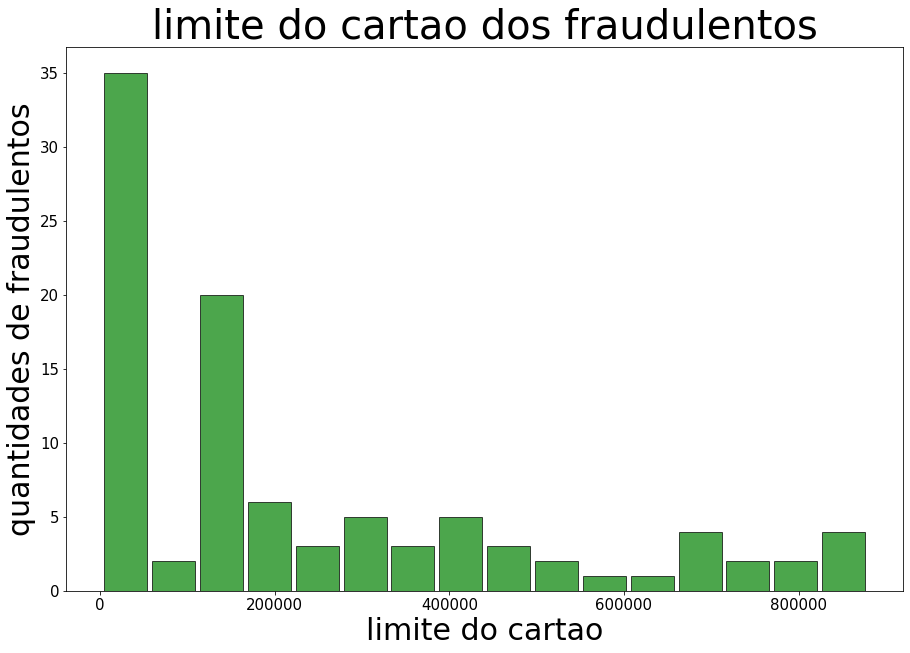

In [33]:
plt.figure(figsize = (15,10))
plt.title('limite do cartao dos fraudulentos', fontsize=40)
plt.xlabel('limite do cartao', fontsize=30 )
plt.ylabel('quantidades de fraudulentos', fontsize=30)
plt.tick_params(labelsize=15)
plt.hist(cards_frauds['credit_limit'] ,16 ,rwidth=0.9, color='green', alpha=0.7, ec='k' )
plt.show()

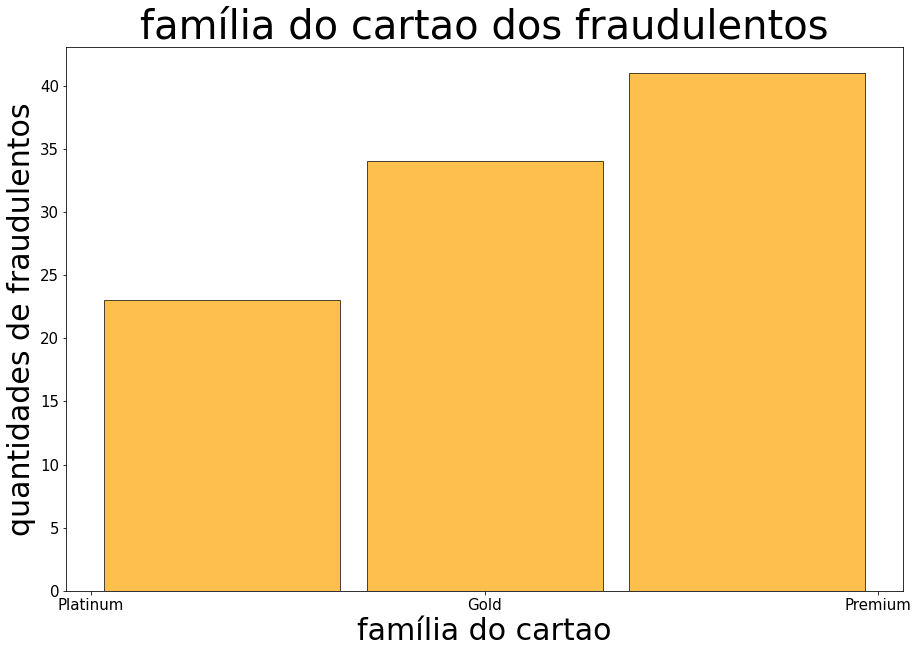

In [34]:
plt.figure(figsize = (15,10))
plt.title('família do cartao dos fraudulentos', fontsize=40)
plt.xlabel('família do cartao', fontsize=30)
plt.ylabel('quantidades de fraudulentos', fontsize=30)
plt.tick_params(labelsize=15)
plt.hist(cards_frauds['card_family'] ,3 ,rwidth=0.9, color='orange', alpha=0.7, ec='k' )
plt.show()

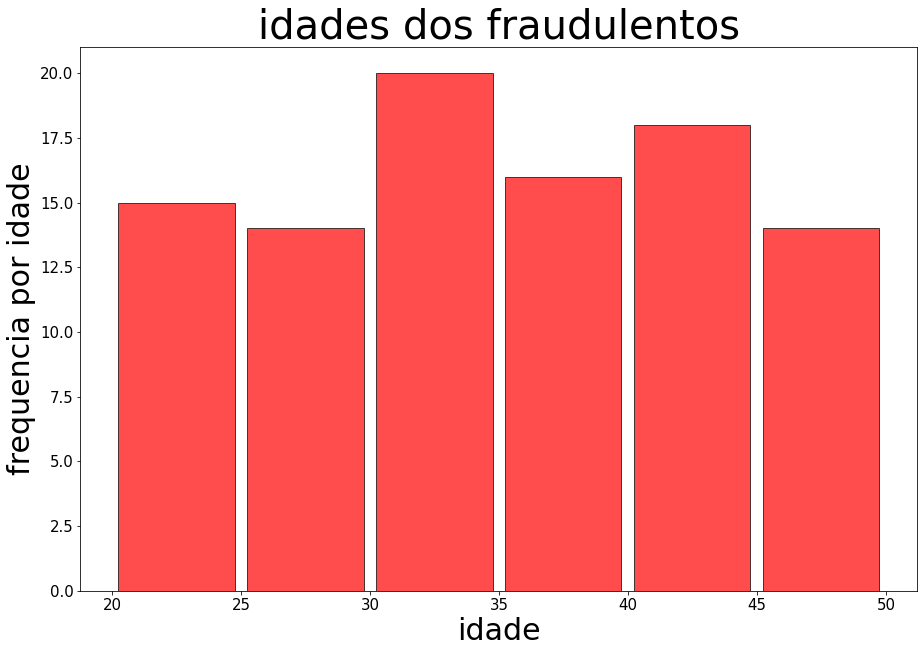

In [35]:
plt.figure(figsize = (15,10))
plt.title('idades dos fraudulentos',fontsize=40)
plt.xlabel('idade', fontsize=30)
plt.ylabel('frequencia por idade',fontsize=30)
plt.tick_params(labelsize=15)
plt.hist(age_frauds['age'] ,6 ,rwidth=0.9, color='red', alpha=0.7, ec='k' )
plt.show()

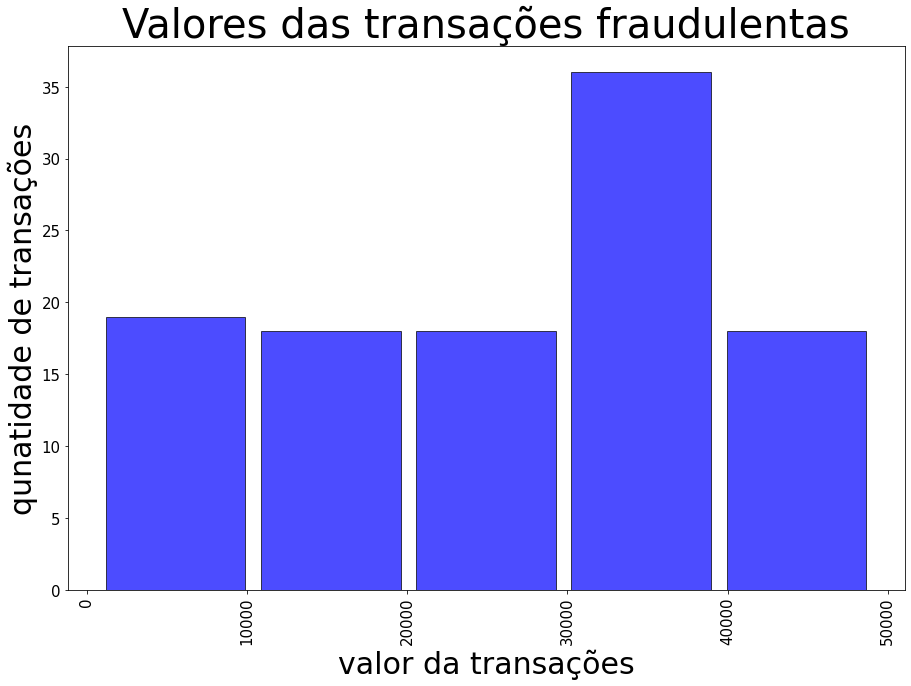

In [49]:
plt.figure(figsize = (15,10))
plt.title('Valores das transações fraudulentas',fontsize=40)
plt.xlabel('valor da transações', fontsize=30)
plt.ylabel('qunatidade de transações',fontsize=30)
plt.tick_params(labelsize=15)
plt.hist(transactions_frauds['value'] ,5 ,rwidth=0.9, color='blue', alpha=0.7, ec='k' )
plt.xticks(rotation=90)
plt.show()

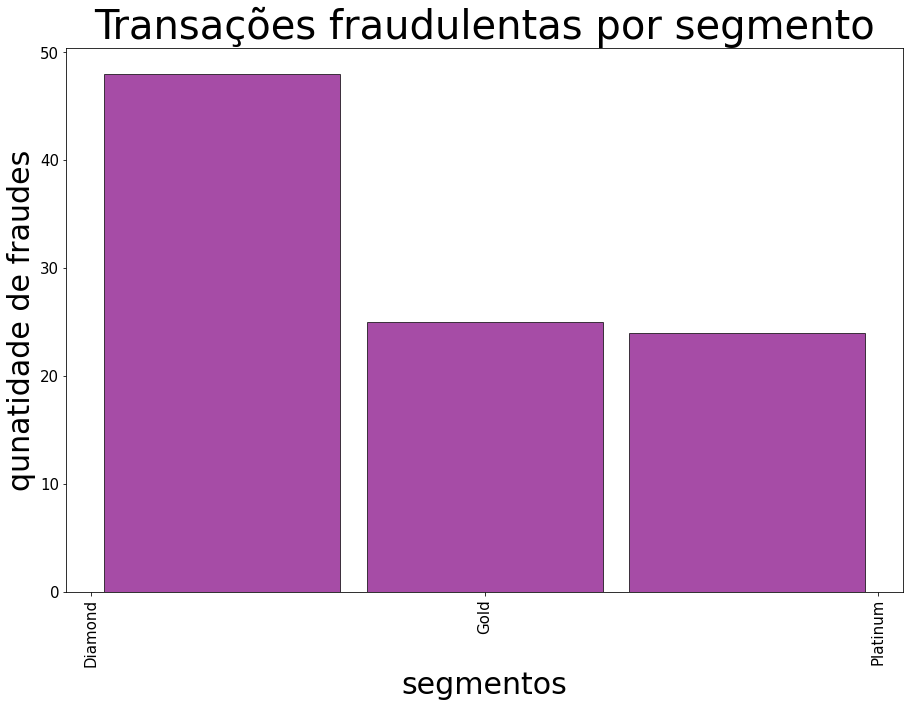

In [44]:
plt.figure(figsize = (15,10))
plt.title('Transações fraudulentas por segmento',fontsize=40)
plt.xlabel('segmentos', fontsize=30)
plt.ylabel('qunatidade de fraudes',fontsize=30)
plt.tick_params(labelsize=15)
plt.hist(age_frauds['segment'] ,3 ,rwidth=0.9, color='purple', alpha=0.7, ec='k' )
plt.xticks(rotation=90)
plt.show()